## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# metadata_df = pd.concat([mouse_metadata,study_results])
# Display the data table for preview
metadata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(metadata_df['Mouse ID']) 

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_DF = metadata_df[metadata_df[["Mouse ID","Timepoint"]].duplicated(keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_DF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# metadata_df.drop_duplicates(subset="Mouse ID",inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(metadata_df['Mouse ID'])

1893

## Summary Statistics

In [7]:
metadata_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregation_functions = {'Tumor Volume (mm3)': ['mean','median','var','std','sem']}

summaryTable = metadata_df.groupby(metadata_df['Drug Regimen']).aggregate(aggregation_functions)
summaryTable = summaryTable['Tumor Volume (mm3)'].rename(columns={"mean": "Mean Tumor Volume",
                                                                  "median": "Median Tumor Volume",
                                                                  "var": "Variance Tumor Volume",
                                                                  "std": "Std. dev Tumor Volume",
                                                                  "sem": "Std. err Tumor Volume"
        
                                                         })
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. dev Tumor Volume,Std. err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

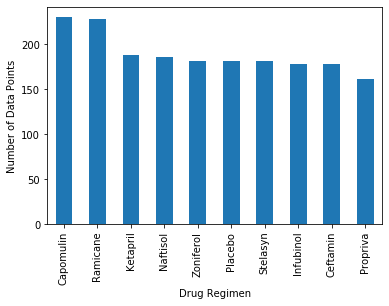

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimenPlot = metadata_df['Drug Regimen'].value_counts()
regimenPlot.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


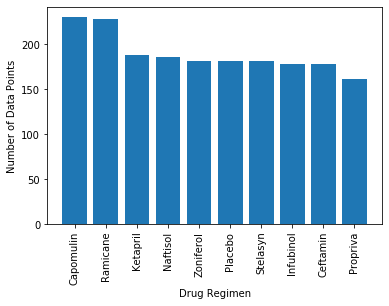

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimenPlot = metadata_df['Drug Regimen'].value_counts()
plt.bar(regimenPlot.index.values,regimenPlot.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


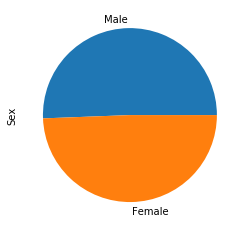

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexPlot = metadata_df.Sex.value_counts()
sexPlot.plot(kind="pie")
plt.show()


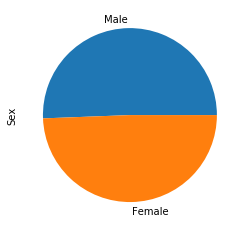

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexPlot = metadata_df.Sex.value_counts()
plt.pie(sexPlot.values,labels=sexPlot.index.values)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatestTumor = metadata_df.groupby(["Mouse ID"]).max()
greatestTumor = greatestTumor.reset_index()
greatestTumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = greatestTumor[['Mouse ID','Timepoint']].merge(metadata_df,on=['Mouse ID','Timepoint'],how="left")
merged_data
capomulinD = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
ramicaneD = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]
infubinolD = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]
ceftaminD = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]

capomulin = capomulinD['Tumor Volume (mm3)']
ramicane = ramicaneD['Tumor Volume (mm3)']
infubinol = infubinolD['Tumor Volume (mm3)']
ceftamin = ceftaminD['Tumor Volume (mm3)']


In [14]:
# Quantitatively determine capomulin outliers
capomulinQuartiles = capomulin.quantile([.25,.5,.75])
capomulinLowerQuartiles = capomulinQuartiles[0.25]
capomulinUpperQuartiles = capomulinQuartiles[0.75]
capomulinRange = capomulinLowerQuartiles-capomulinUpperQuartiles
capomulinLowerBound = capomulinLowerQuartiles - (1.5*capomulinRange)
capomulinUpperBound = capomulinUpperQuartiles + (1.5*capomulinRange)
print("Quartiles", capomulinQuartiles)
print("LowerQ", capomulinLowerQuartiles)
print("UpperQ", capomulinUpperQuartiles)
print("Range", capomulinRange)
print("UpperB", capomulinUpperBound)
print("LowerB", capomulinLowerBound)

print("outliers lower", len(capomulin.loc[(capomulin < capomulinLowerBound)]))
print("outliers Upper", len(capomulin.loc[(capomulin > capomulinUpperBound)]))                                      

Quartiles 0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
LowerQ 32.37735684
UpperQ 40.1592203
Range -7.781863460000004
UpperB 28.486425109999995
LowerB 44.05015203000001
outliers lower 23
outliers Upper 22


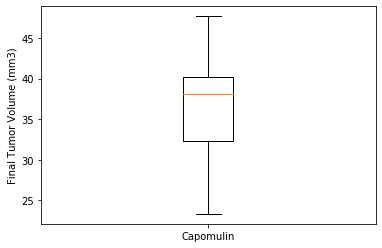

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red')
plt.boxplot(capomulin,labels=['Capomulin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

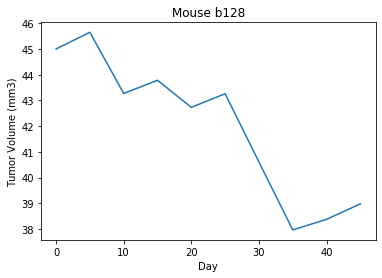

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinD = metadata_df.loc[metadata_df['Drug Regimen'] == "Capomulin"]
plotData = capomulinD.loc[capomulinD['Mouse ID']== 'b128']
plt.plot(plotData['Timepoint'],plotData['Tumor Volume (mm3)'])
plt.xlabel('Day')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse b128')
plt.show()

## Correlation and Regression